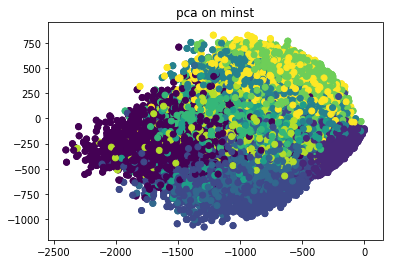

In [7]:
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28*28))


def pca(data):
    cova = cov(data.T)
    values, vectors = eig(cova)
    idx = (np.argsort(np.abs(values))[::-1])
    values = values[idx]
    vectors = vectors[idx]
    return values, vectors

values, vectors = pca(X_train)
P = vectors.T[:2].dot(X_train.T)


plt.scatter(P.T[:, 0], P.T[:, 1],c=y_train)



plt.title("pca on minst")
plt.show()

In [10]:
!git push origin master

Counting objects: 3, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.14 KiB | 1.14 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/BastienBP/unsupervised-clustering.git
   f167e8e..a4cfc5e  master -> master
